# Wav File Exploration for VAD Features

This exploration uses the TIMIT dataset in a folder 'datasets/TIMIT' under the repo root.
TIMIT is available from: http://academictorrents.com/details/34e2b78745138186976cbc27939b1b34d18bd5b3

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
from scipy.io import wavfile

In [2]:
# tweak the plotting settings
plt.rc('figure', figsize=(20.0, 10.0))

In [3]:
# a test wav from TIMIT, with SPHERE header removed with audacity so scipy.io.wavfile can read it
fs, data = wavfile.read('datasets/test.wav')

In [4]:
# What does the data look like?
data

array([ 4,  3,  5, ...,  7, 10,  8], dtype=int16)

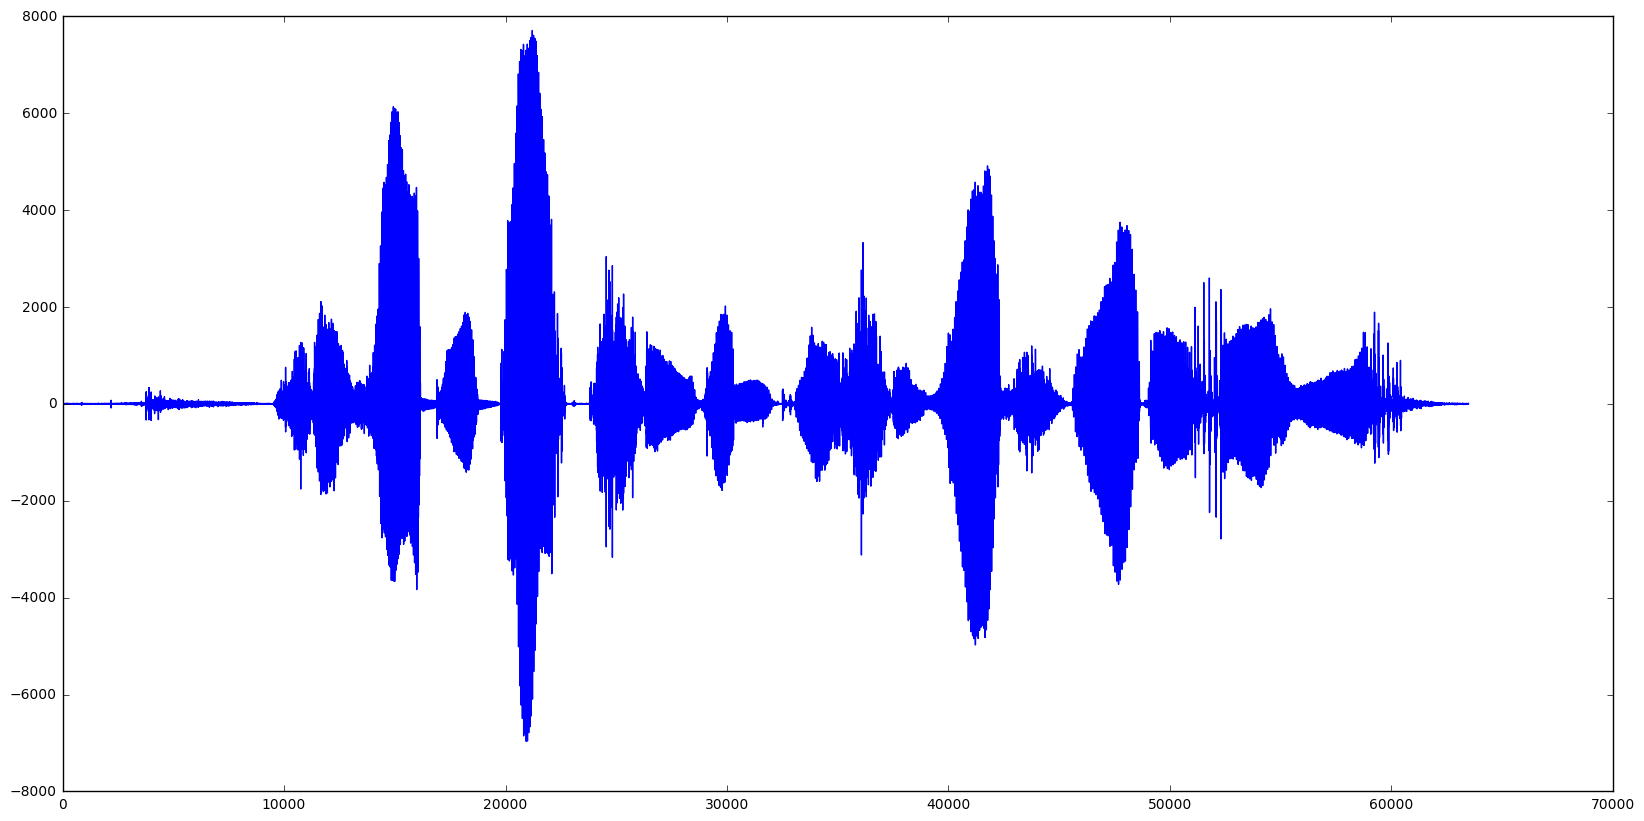

In [5]:
# Let's plot the data
plt.plot(data) 
plt.show()

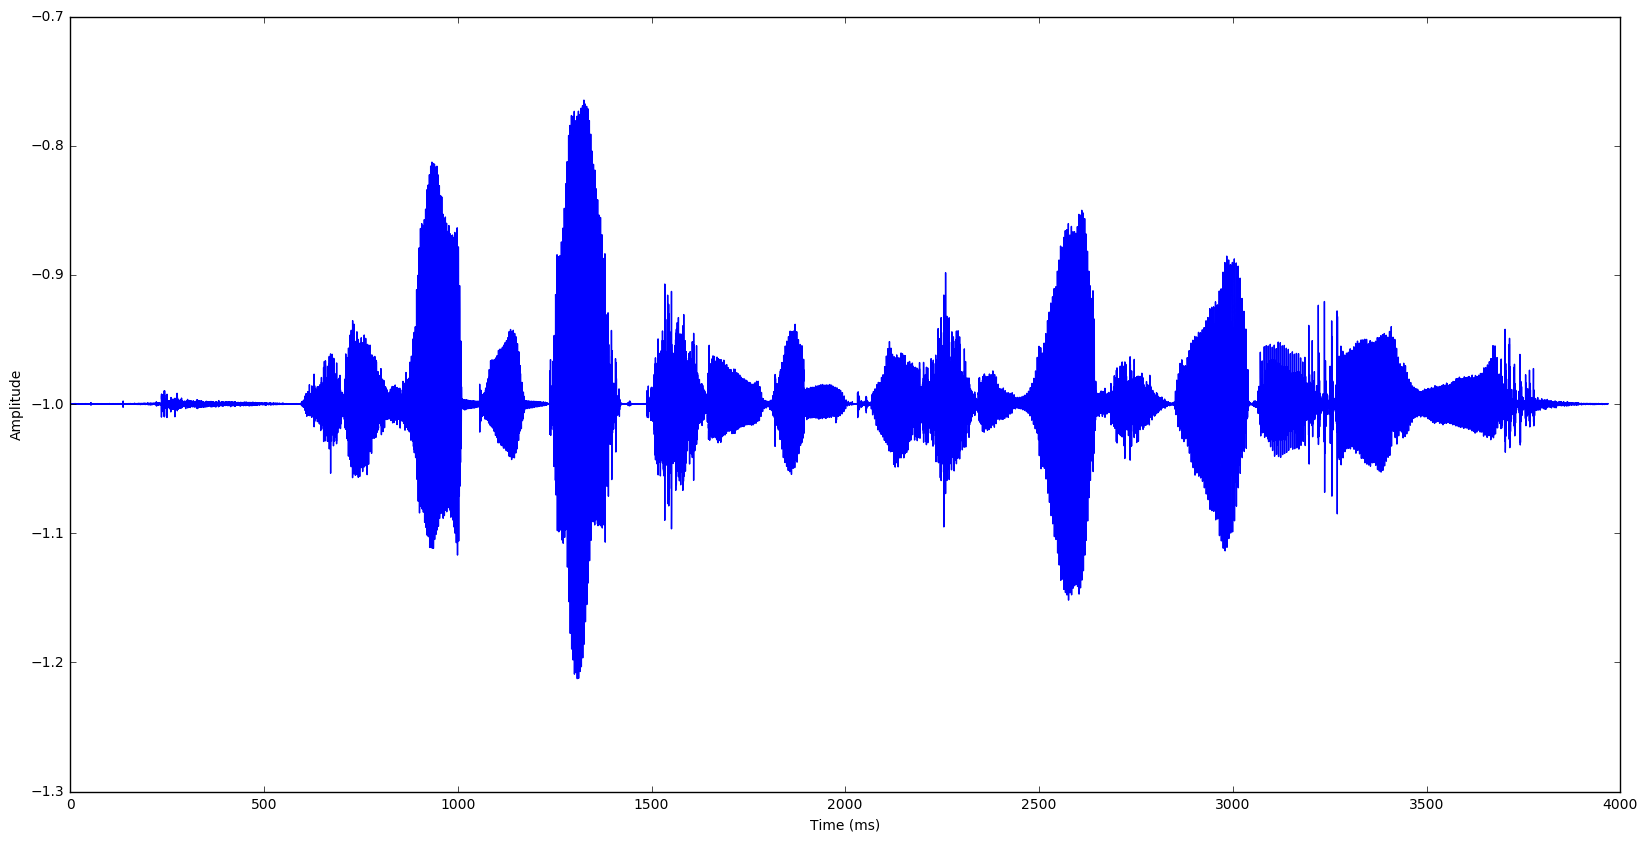

In [6]:
# Normalise the data and plot
normalised_data=np.fromiter(((ele/2**16.)*2-1 for ele in data), np.float)# 16-bit track now normalized on [-1,1)

# plot in ms
time_array = np.arange(0, float(normalised_data.shape[0]), 1)
time_array = time_array / 16000  # 16KHz
time_array = time_array * 1000  # scale to ms

plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.plot(time_array, normalised_data) 
plt.show()

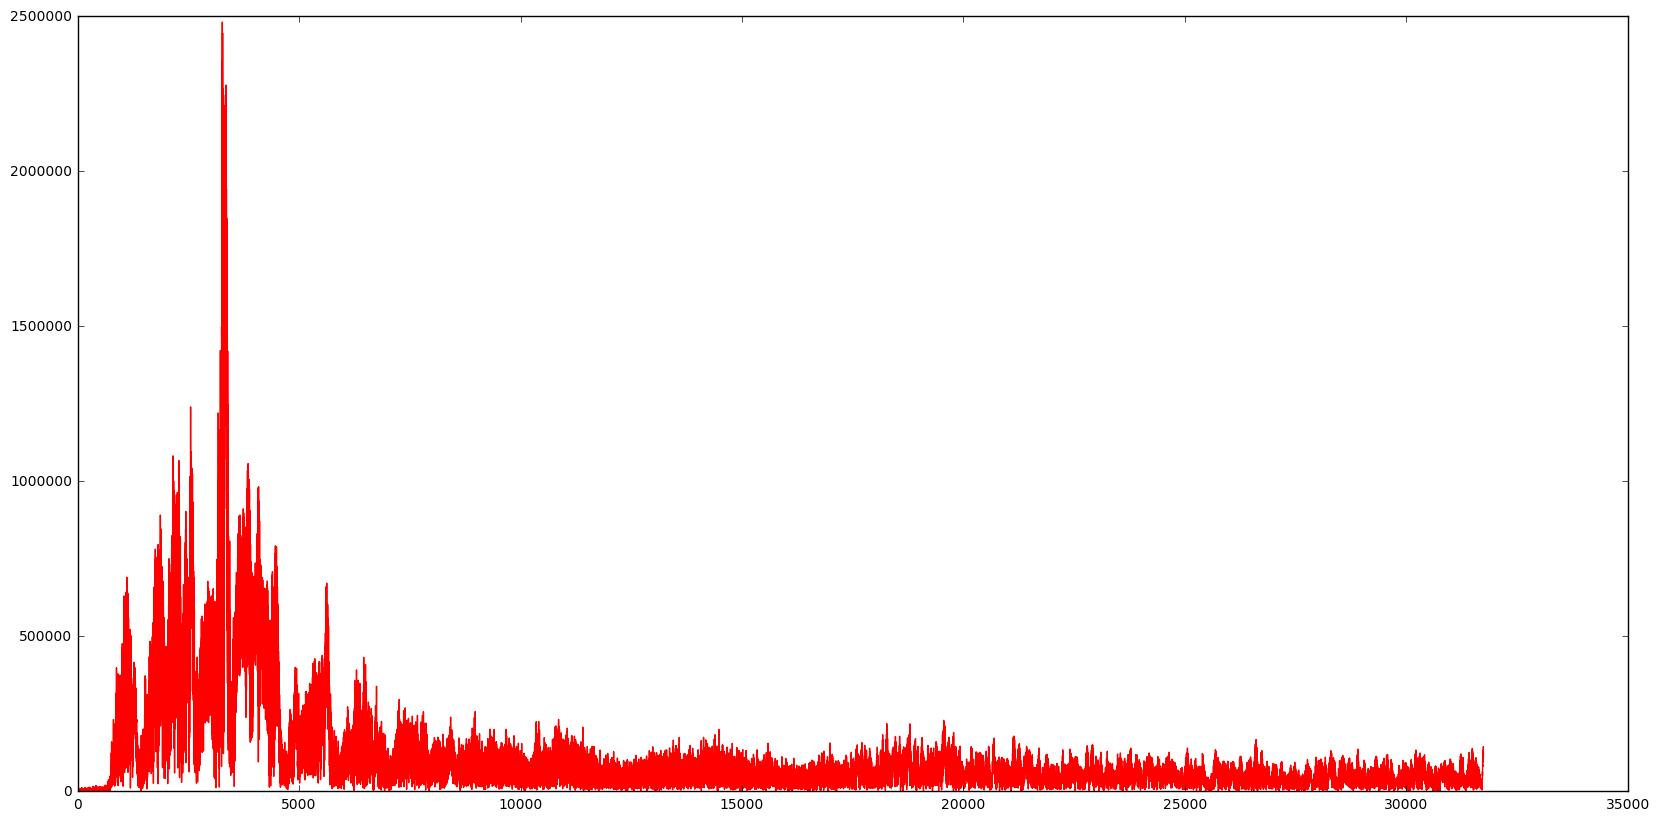

In [14]:
# and plot the spectrum
c = fft(data) 
d = len(c)/2 
plt.plot(abs(c[:(int(d)-1)]),'r') 
plt.show()